<a href="https://colab.research.google.com/github/Uliana313/NM/blob/main/%D0%9B%D0%A04_%D0%A1%D0%B8%D0%B4%D0%BE%D1%80%D0%B5%D0%BD%D0%BA%D0%BE_14%D0%B2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

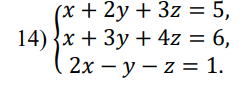

In [1]:
import numpy as np
a =  np.array([
        [1.0, 2.0, 3.0],
        [1.0, 3.0, 4.0],
        [2.0, -1.0, -1.0]
    ])
b = np.array([5.0, 6.0, 1.0])

In [2]:
#Матричний метод (1 спосіб)
det_a = np.linalg.det(a)
if det_a == 0:
    print("Визначник дорівнює нулю - розв'язків немає")
else:
  a_inv = np.linalg.inv(a)
  print(f"Обернена матриця до матриці A: \r\n {a_inv }")
  print(f"Вектор рішення: \r\n {a_inv.dot(b)}")

Обернена матриця до матриці A: 
 [[-0.5  0.5  0.5]
 [-4.5  3.5  0.5]
 [ 3.5 -2.5 -0.5]]
Вектор рішення: 
 [ 1. -1.  2.]


In [3]:
# Напиши функцію для вирішення системи матричним методом (2 спосіб)
def solve_inv_matrix(a, b, verbose=False):
    det = np.linalg.det(a)
    if verbose: print(f"Визначник матриці A: {round(det)}")
    if det == 0:
        print("Визначник дорівнює нулю - рішень немає")
        return None

    a_inv= np.linalg.inv(a)
    if verbose: print(f"Обернена матриця до матриці A: \r\n {a_inv }")
    return a_inv.dot(b)

print(f"Вектор рішення: \r\n {solve_inv_matrix(a, b)}")

Вектор рішення: 
 [ 1. -1.  2.]


In [4]:
#метод Крамера (1 спосіб)
# Метод Крамера
det_a = np.linalg.det(a)

if det_a == 0:
    print("Визначник дорівнює нулю — система не має  розв’язку.")
else:
    def replace_column(matrix, column_index, new_column):
        new_matrix = np.copy(matrix)
        new_matrix[:, column_index] = new_column
        return new_matrix

    # Обчислюємо Δx, Δy, Δz
    delta_x = np.linalg.det(replace_column(a, 0, b.T))
    delta_y = np.linalg.det(replace_column(a, 1, b.T))
    delta_z = np.linalg.det(replace_column(a, 2, b.T))

    # Обчислюємо x, y, z
    print('x =', delta_x / det_a)
    print('y =', delta_y / det_a)
    print('z =', delta_z / det_a)



x = 0.9999999999999989
y = -1.0000000000000004
z = 2.0000000000000004


In [6]:
# Напиши функцію для вирішення системи методом Крамера
def solve_cramer(a, b, verbose=False):
    det = np.linalg.det(a)
    if verbose:
        print(f"Визначник матриці A: {round(det)}")
    if det == 0:
        print("Визначник дорівнює нулю - розв'язків немає")
        return None

    n = len(a)
    x = np.zeros((n, 1))

    for i in range(n):
        temp = np.copy(a)
        temp[:, [i]] = b.reshape(-1, 1)
        x[i, 0] = np.linalg.det(temp) / det

    return x


print(f"Вектор рішення: \r\n {solve_cramer(a, b)}")

Вектор рішення: 
 [[ 1.]
 [-1.]
 [ 2.]]


Перевірка

In [7]:
x = np.linalg.solve(a, b)

print(x)

[ 1. -1.  2.]


In [9]:
# Напиши функцію для вирішення системи методом Гауса
def solve_gausse(a, b, verbose=False):
    det = np.linalg.det(a)
    if verbose:
        print(f"Визначник матриці A: {round(det)}")
    if det == 0:
        print("Визначник дорівнює нулю - розв'язків немає")
        return None

    # Кількість невідомих
    n = len(b)

    b = b.reshape(-1, 1)

    m = np.concatenate([a.astype(float), b.astype(float)], axis=1)

    # Метод Гауса
    for i in range(n):
        # Уникнення ділення на 0 — перестановка рядків
        if m[i, i] == 0:
            for k in range(i + 1, n):
                if m[k, k] != 0:
                    m[[i, k], :] = m[[k, i], :]
                    break

        if m[i, i] != 1:
            m[i, :] /= m[i, i]

        for j in range(n):
            if i != j:
                ratio = m[j, i]
                m[j, :] -= ratio * m[i, :]

    return m[:, [-1]]


print(f"Вектор рішення: \r\n {solve_gausse(a, b)}")

Вектор рішення: 
 [[ 1.]
 [-1.]
 [ 2.]]
